## Import dependecies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

### Binomal Distribution

the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment, either Success or Failure. For example, if we toss a coin, there could be only two possible outcomes: heads or tails, and if any test is taken, then there could be only two results: pass or fail. This distribution is also called a binomial probability distribution.
There are two parameters n and p used here in a binomial distribution. The variable ‘n’ states the number of times the experiment runs and the variable ‘p’ tells the probability of any one outcome.

$P(x) = \frac {n!} {x! (n-x)!} {p}^{x} {q}^{n-x} $ this equation gives the probability of `x` successes in `n` trials with `p` probability of success and `q` probability of failure where $q = 1 - p$.

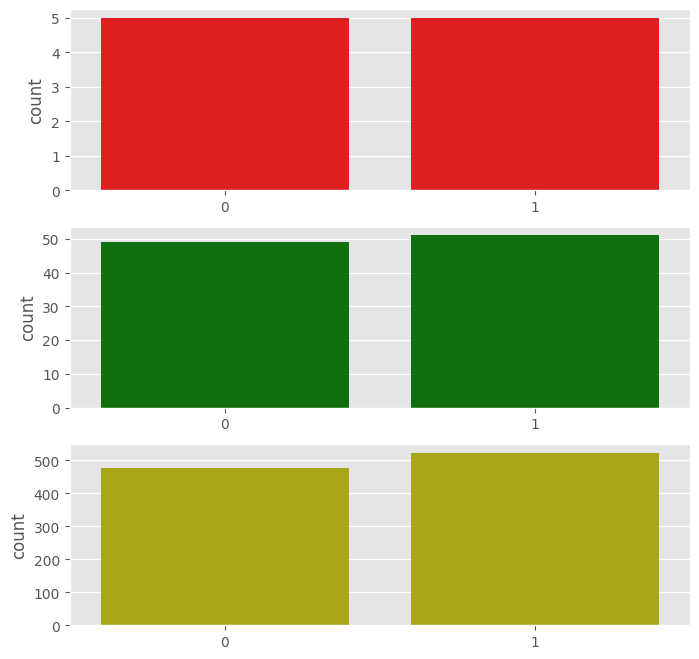

In [2]:
# we will simulate coin toss for different size and plot count for every size
sizes = [10,100,1000]
colors = ['r','g','y']
fig,axs = plt.subplots(len(sizes),1, figsize=(8,8))
for idx,size in enumerate(sizes):
    data = np.random.binomial(n = 1,p = 0.5,size=size)
    sns.countplot(x=data, ax=axs[idx],color=colors[idx])

we can see when we increase size we got both outcomes' probability really close.

## Poisson Distribuation

A Poisson distribution is a discrete probability distribution, meaning that it gives the probability of a discrete (i.e., countable) outcome. For Poisson distributions, the discrete outcome is the number of times an event occurs, represented by $\lambda$.

You can use a Poisson distribution to predict or explain the number of events occurring within a given interval of time or space. “Events” could be anything from disease cases to customer purchases to meteor strikes. The interval can be any specific amount of time or space, such as 10 days or 5 square inche
mean and variance of Poisson distribution is $\lambda$.


$P(X=k) = \frac {e^{-\lambda} \lambda ^{k}}{k!} $ where k in number of events occurring within a given interval of time or space.s.

In [3]:
from scipy.stats import poisson

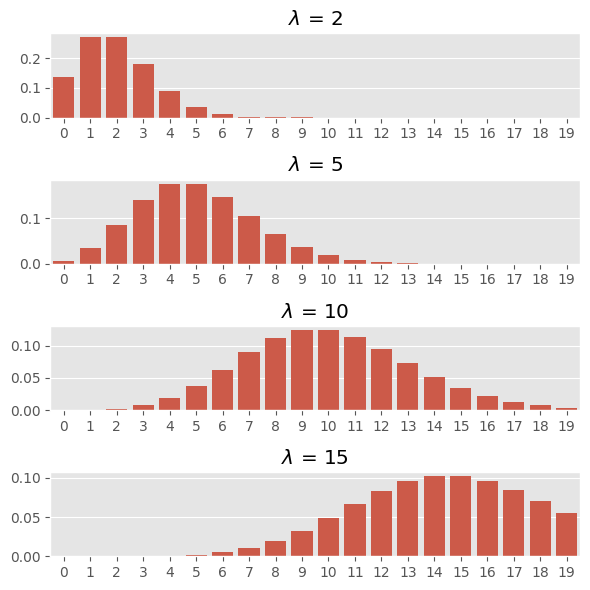

In [4]:
rates = [2,5,10,15]
fig, axs = plt.subplots(nrows=len(rates),ncols=1, figsize=(6,6))
x = np.arange(0,20)
for idx,ax in enumerate(axs):
    p = poisson.pmf(x, rates[idx])
    sns.barplot(x=x,y=p, ax=ax)
    ax.set_title(f'$\lambda$ = {rates[idx]}')

plt.tight_layout()

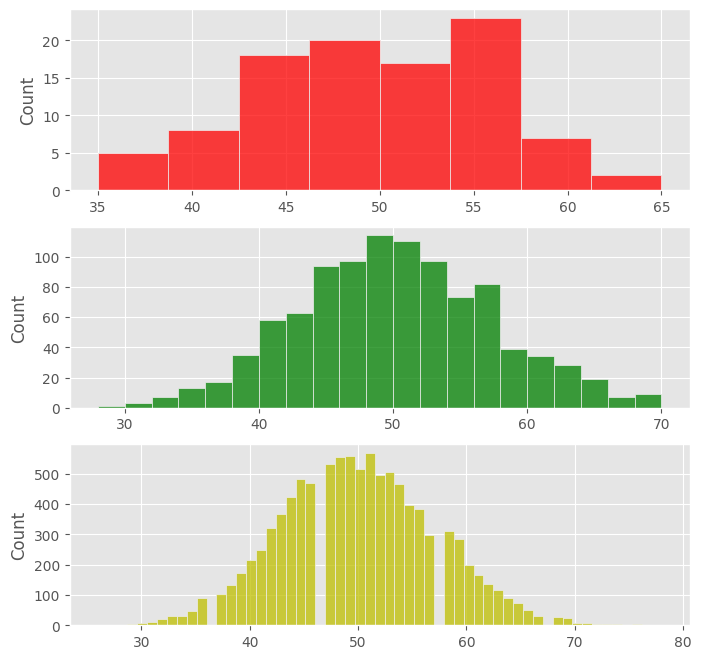

In [5]:
# we will simulate poisson distrubation for different size.
size = [100,1000,10000]
rate = 50
colors = ['r','g','y']
fig,axs = plt.subplots(len(size),1, figsize=(8,8))
for idx,size in enumerate(size):
    data = np.random.poisson(lam=rate,size=size)
    sns.histplot(data, ax=axs[idx],color= colors[idx])

### Uniform discrete random variable.

$p(x) =\frac {1} {high-low}$ where `high` is largest possible outcome and `low` is smallest possible outcome.
and x must belongs to {low,..., high-1}.

In [6]:
#assume dice has been thrown 
from scipy.stats import randint
low = 1   # smallest possible outcome
high = 7   # largest possible outcome has been incremented by 1 to include 6 in the output
tested_number_probablity = 4
print(f"Probabilty of {tested_number_probablity} when I throw a fair dice = {randint.pmf(tested_number_probablity, low, high):.4f}")

Probabilty of 4 when I throw a fair dice = 0.1667


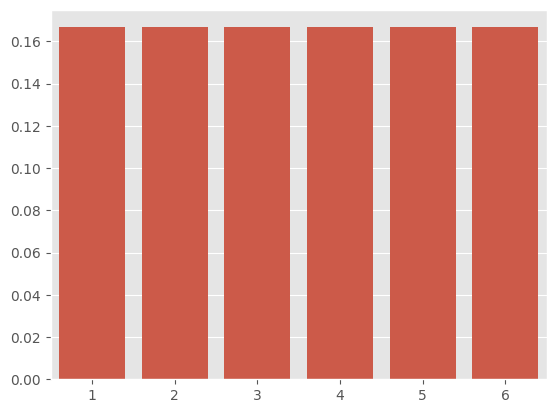

In [7]:
low = 1   # smallest possible outcome
high = 7   # largest possible outcome has been incremented by 1 to include 6 in the output
x = np.arange(1,high)
p = randint.pmf(x,low,high)
sns.barplot(x=x, y=p)
plt.show()

## Exponential Distribution

The exponential distribution is one of the widely used continuous distributions. It is often used to model the time elapsed between events.
$F(x) = \lambda e^{-\lambda x} u(x) $ where $\lambda$ is called the distribution rate. 

$\mu = \frac {1} {\lambda}$ and $Var = \frac {1} {\lambda^{2}}$.

In [8]:
from scipy.stats import expon

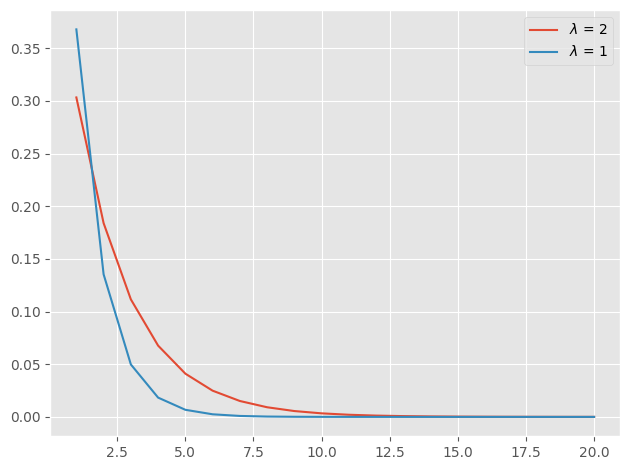

In [9]:
x = np.arange(1,21)

rate1 = 2
p1 = expon.pdf(x, loc=0, scale=rate1)
plt.plot(x, p1, label=f'$\lambda$ = {rate1}')

rate2 = 1
p2 = expon.pdf(x, loc=0, scale=rate2)
plt.plot(x, p2, label=f'$\lambda$ = {rate2}')
plt.legend()
plt.tight_layout()
plt.show()

## Normal Distribution

Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. The normal distribution appears as a `bell curve` when graphed.

$f(x) = \frac {1}{\sigma \sqrt {2\pi}} e^{\frac {-1}{2} (\frac {x-\mu}{\sigma})^{2}}$.

where:
- x = value of the variable or data being examined and f(x) the probability function.
- μ = the mean.
- σ = the standard deviation.tion

### The Empirical Rule
For all normal distributions, 68.2% of the observations will appear within plus or minus one standard deviation of the mean; 95.4% will fall within +/- two standard deviations; and 99.7% within +/- three standard deviations.

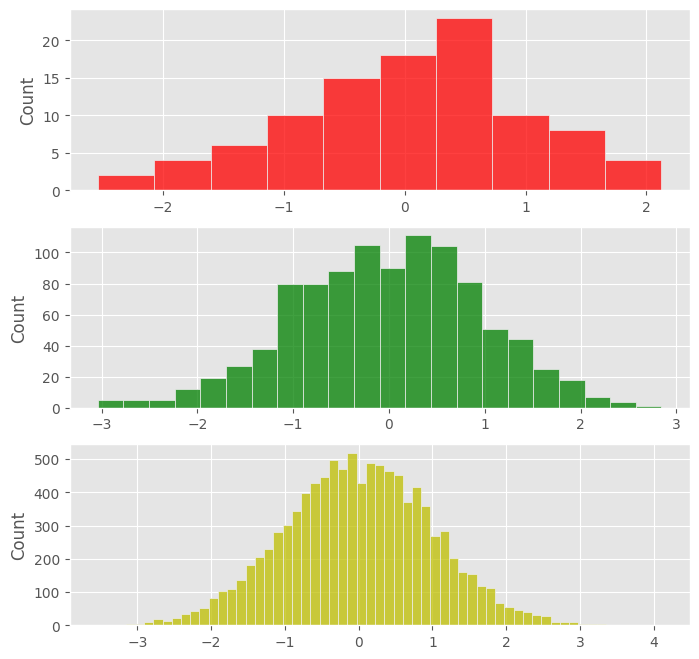

In [10]:
# we will simulate normal distrubation for different size.
size = [100,1000,10000]
rate = 50
colors = ['r','g','y']
fig,axs = plt.subplots(len(size),1, figsize=(8,8))
for idx,size in enumerate(size):
    data = np.random.normal(loc=0, scale = 1, size = size)
    sns.histplot(data, ax=axs[idx],color= colors[idx])

In [11]:
from scipy.stats import norm

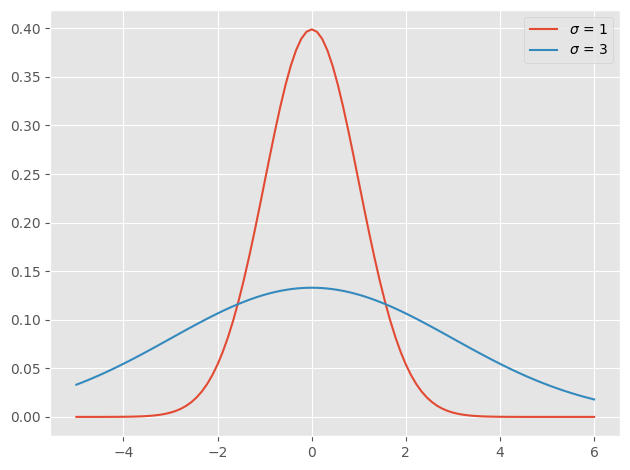

In [12]:
x = np.linspace(-5,6,num=100)

mu = 0
sigma1 = 1
p1 = norm.pdf(x, loc=mu, scale=sigma1)
plt.plot(x, p1, label=f'$\sigma$ = {sigma1}')

sigma2 = 3
p2 = norm.pdf(x, loc=0, scale=sigma2)
plt.plot(x, p2, label=f'$\sigma$ = {sigma2}')
plt.legend()
plt.tight_layout()
plt.show()

if we want to calculate probability at `x` value it means we are getting area under the curve for all values less than `x` so from -$\infty$ to x.

In [13]:
mu = 0
sigma = 1
x = 0.5
p = norm.cdf(x,loc=mu, scale=sigma)
print(f"Probability for z less than {x} = {p}")

Probability for z less than 0.5 = 0.6914624612740131


what if we had the probability and wanted to get the value which caused this probability?
we can use `ppf` function for this .

we know we can get 68.2% of the values with given -/+ 1 $\sigma$  , so for + 1 $\sigma$ we have half of this value which is 34.1% from 0 to 1 $\sigma$ so from -$\infty$ to 1 $\sigma$ we have 0.5 (from -$\infty$  to 0) + 0.341 which equal to 0.841, we want to verify at this probability we have x =  $\sigma$ which here $\sigma$ is 1 as well.

In [14]:
p = 0.841
x = norm.ppf(p, loc=mu, scale=sigma)
print(f"For probability = {p} we have x = {x}")

For probability = 0.841 we have x = 0.9985762706156592


It's approximately 1 but we have rounded the probabilties as well. 